# Ejercicio Modelo de regresión data set housing

### EDA y Regresion Miltiple 

# Desarrollo de ejercicio 


## Importación de librerias 

In [1]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import os

## Importación de los datos 

In [2]:
df=pd.read_csv('Archivos/housing_train.csv',sep=',')
df

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7039061606,https://bham.craigslist.org/apa/d/birmingham-h...,birmingham,https://bham.craigslist.org,1195,apartment,1908,3,2.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00L0L_80pNkyDeG0...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
1,7041970863,https://bham.craigslist.org/apa/d/birmingham-w...,birmingham,https://bham.craigslist.org,1120,apartment,1319,3,2.0,1,...,0,0,0,laundry on site,off-street parking,https://images.craigslist.org/00707_uRrY9CsNMC...,Find Your Way to Haven Apartment Homes Come ho...,33.3755,-86.8045,al
2,7041966914,https://bham.craigslist.org/apa/d/birmingham-g...,birmingham,https://bham.craigslist.org,825,apartment,1133,1,1.5,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00h0h_b7Bdj1NLBi...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
3,7041966936,https://bham.craigslist.org/apa/d/birmingham-f...,birmingham,https://bham.craigslist.org,800,apartment,927,1,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00808_6ghZ8tSRQs...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
4,7041966888,https://bham.craigslist.org/apa/d/birmingham-2...,birmingham,https://bham.craigslist.org,785,apartment,1047,2,1.0,1,...,0,0,0,laundry on site,street parking,https://images.craigslist.org/00y0y_21c0FOvUXm...,Apartments In Birmingham AL Welcome to 100 Inv...,33.4226,-86.7065,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265185,7050851033,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,0,apartment,1061,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00m0m_8wP9hX96TZ...,â BERKLEY HOUSE â Voted #1 BEST Communit...,40.0495,-83.0669,oh
265186,7050887997,https://columbus.craigslist.org/apa/d/grove-ci...,columbus,https://columbus.craigslist.org,1069,apartment,1020,2,1.5,1,...,0,0,0,w/d hookups,detached garage,https://images.craigslist.org/00N0N_ioCvFNCv24...,!!!!Tour today and receive $5 Starbucks gift c...,39.8408,-83.0804,oh
265187,7044801015,https://columbus.craigslist.org/apa/d/columbus...,columbus,https://columbus.craigslist.org,1507,apartment,1660,2,1.5,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00j0j_5EIRWzdHCV...,"The Commons at Olentangy4765 Blairfield Dr, Co...",40.0564,-83.0417,oh
265188,7050885800,https://columbus.craigslist.org/apa/d/newark-l...,columbus,https://columbus.craigslist.org,1001,apartment,1220,3,1.5,1,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00J0J_6VSTqFJb86...,www.McMillenWoods.com www.mcmillenwoods.com ...,40.0451,-82.4564,oh


## Analisis y gestion de los datos 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       265190 non-null  int64  
 1   url                      265190 non-null  object 
 2   region                   265190 non-null  object 
 3   region_url               265190 non-null  object 
 4   price                    265190 non-null  int64  
 5   type                     265190 non-null  object 
 6   sqfeet                   265190 non-null  int64  
 7   beds                     265190 non-null  int64  
 8   baths                    265190 non-null  float64
 9   cats_allowed             265190 non-null  int64  
 10  dogs_allowed             265190 non-null  int64  
 11  smoking_allowed          265190 non-null  int64  
 12  wheelchair_access        265190 non-null  int64  
 13  electric_vehicle_charge  265190 non-null  int64  
 14  come

In [4]:
df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

### Duplicados y valores faltantes 

In [5]:
# valores duplciados en el data set
duplicates = df.duplicated().sum()
print(f" El data set contiene: {duplicates} registros duplicados ")

 El data set contiene: 0 registros duplicados 


In [6]:
# Valores nulos en el data set
missing_data=df.isnull().sum().sort_values(ascending=False)
print(f"El data set contiene {missing_data.sum()} valores nulos")
missing_data = missing_data[missing_data > 0]
total_data = df.shape[0]
percentage = (missing_data / total_data) * 100
print(missing_data)
print(percentage)

El data set contiene 152287 valores nulos
parking_options    95135
laundry_options    54311
long                1419
lat                 1419
description            2
state                  1
dtype: int64
parking_options    35.874279
laundry_options    20.480033
long                0.535088
lat                 0.535088
description         0.000754
state               0.000377
dtype: float64


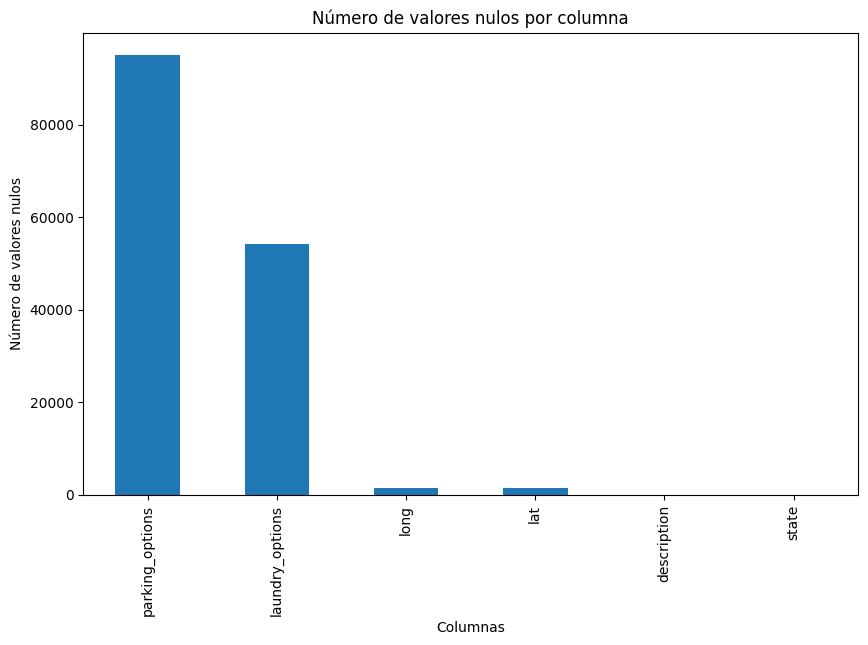

In [7]:
# Valores nulos en el data set
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

# Graficar los valores nulos
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar')
plt.title('Número de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.show()

In [9]:
df.groupby('region')['state'].value_counts()

region                  state
SF bay area             ca       2327
akron / canton          oh       1532
albany                  ny       1244
                        ga        846
albuquerque             nm       2144
                                 ... 
winston-salem           nc       2123
worcester / central MA  ma       1452
yuba-sutter             ca        152
yuma                    az        215
zanesville / cambridge  oh          3
Name: count, Length: 310, dtype: int64

In [12]:
# agrupar por tipo de propiedad
df.groupby('type')['laundry_options'].value_counts()
# Rellenando las laundry_options que faltan con el valor de modo de laundry_options para el tipo de casa.
df['laundry_options'] = df.groupby('type')['laundry_options'].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
# Rellenando las laundry_options que faltan con el valor de modo de laundry_options para el tipo de casa.
df['laundry_options'] = df.groupby('type')['laundry_options'].transform(lambda x: x.fillna(x.mode()[0]))

In [13]:
# lista con las variables numéricas que contienen valores faltantes
vars_with_na = [
    var for var in df.columns
    if df[var].isnull().sum() > 0 and df[var].dtypes != 'O'
]
print(vars_with_na)
# print percentage of missing values per variable
df[vars_with_na].isnull().mean()

['lat', 'long']


lat     0.005351
long    0.005351
dtype: float64

In [14]:
# agrupar regiones por latitud
df.groupby('region')['lat'].value_counts()
# Rellenando las latitudes que faltan con el valor de la latitud promedio para la región.
df['lat'] = df.groupby('region')['lat'].transform(lambda x: x.fillna(x.mean()))

In [15]:
# agrupar regiones por longitud
df.groupby('region')['long'].value_counts()
# Rellenando las longitudes que faltan con el valor de la longitud promedio para la región.
df['long'] = df.groupby('region')['long'].transform(lambda x: x.fillna(x.mean()))

In [16]:
# verificacion de la variables region y state
df[['region','state']].head(15)

,region,state
0,birmingham,al
1,birmingham,al
2,birmingham,al
3,birmingham,al
4,birmingham,al
5,birmingham,al
6,birmingham,al
7,birmingham,al
8,birmingham,al
9,birmingham,al


In [17]:
# manejando valores nulos
freq_encoding = df['state'].value_counts().idxmax()
df['state'].fillna(freq_encoding, inplace=True)

## Reducción de los datos 

In [18]:
## Check "parking_options", "laundry_options"
data = df.drop(columns=["id", "url", "region_url", "image_url", "description", "lat", "long", "parking_options", "laundry_options"])
data.head()


,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,al


## Ingeniería de Características (Feature Engineering)

In [19]:
# Calcula el precio por pie cuadrado dividiendo el valor de la columna price por el valor de la columna sqfeet.
data["price_per_sqfeet"] = data["price"] / data["sqfeet"]
# Calcula el número de baños por cada habitación dividiendo el valor de la columna baths por el valor de la columna beds.
data["baths_per_beds"] = data["baths"] / data["beds"]
# Calcula el número de habitaciones por pie cuadrado dividiendo el valor de la columna beds por el valor de la columna sqfeet.
data["beds_per_sqfeet"] = data["beds"] / data["sqfeet"]

# Calcula el percentil 80 del precio de las casas y lo almacena en la variable luxury_threshold
luxury_threshold = data['price'].quantile(0.80)

# Crea una nueva columna home_type en el DataFrame data.
# Asigna el valor 'Luxury Home' a las casas cuyo precio es mayor o igual al luxury_threshold.
# Asigna el valor 'Standard Home' a las casas cuyo precio es menor al luxury_threshold.
data['home_type'] = data['price'].apply(lambda x: 'Luxury Home' if x >= luxury_threshold else 'Standard Home')


# Verificar la cantidad de valores únicos en la columna home_type
data['home_type'].value_counts()

home_type
Standard Home    212037
Luxury Home       53153
Name: count, dtype: int64

## Agrupar las variables segun su tipo

In [20]:
# asignar la variable target o variable objetivo
targer_var = "price"

In [21]:
# seleccionar las variables categoricas
vars_cat = [var for var in data.columns if data[var].dtype == "O"
            or var == "cats_allowed"
            or var == "dogs_allowed"
            or var == "smoking_allowed"
            or var == "wheelchair_access"
            or var == "electric_vehicle_charge"
            or var == "comes_furnished"]

In [22]:
# seleccionar las variables numericas
vars_nums = [var for var in data.columns if data[var].dtype != "O" and var != "price" and var not in vars_cat]

In [23]:
# seleccionar las variables discretas
vars_disc = ["beds", "baths"]

In [24]:
# seleccionar las variables continuas
vars_con = ["sqfeet","price_per_sqfeet", "baths_per_beds", "beds_per_sqfeet"]

## Análisis Univariado

In [25]:
# seleccionar las variables binarias
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

data_cleaned = remove_outliers(data, 'price')
data_cleaned = remove_outliers(data_cleaned, 'sqfeet')

In [26]:
# Calcula el percentil 85 del precio de las casas y lo almacena en la variable luxury_threshold
luxury_threshold = data_cleaned['price'].quantile(0.85)
data_cleaned['home_type'] = data_cleaned['price'].apply(lambda x: 'Luxury Home' if x >= luxury_threshold else 'Standard Home')

In [27]:
# Verificar la cantidad de valores únicos en la columna home_type
data_cleaned['home_type'].value_counts()

home_type
Standard Home    206051
Luxury Home       36588
Name: count, dtype: int64

In [28]:
# verificar los valores unicos de la columna region
df["region"].value_counts()

region
jacksonville              4246
rochester                 3677
fayetteville              3652
omaha / council bluffs    2727
denver                    2671
                          ... 
corvallis/albany             3
kansas city                  3
northwest OK                 2
east oregon                  1
texoma                       1
Name: count, Length: 298, dtype: int64

## Análisis Univeriado de Variables Categorías

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y=var, order=order, palette="rocket")


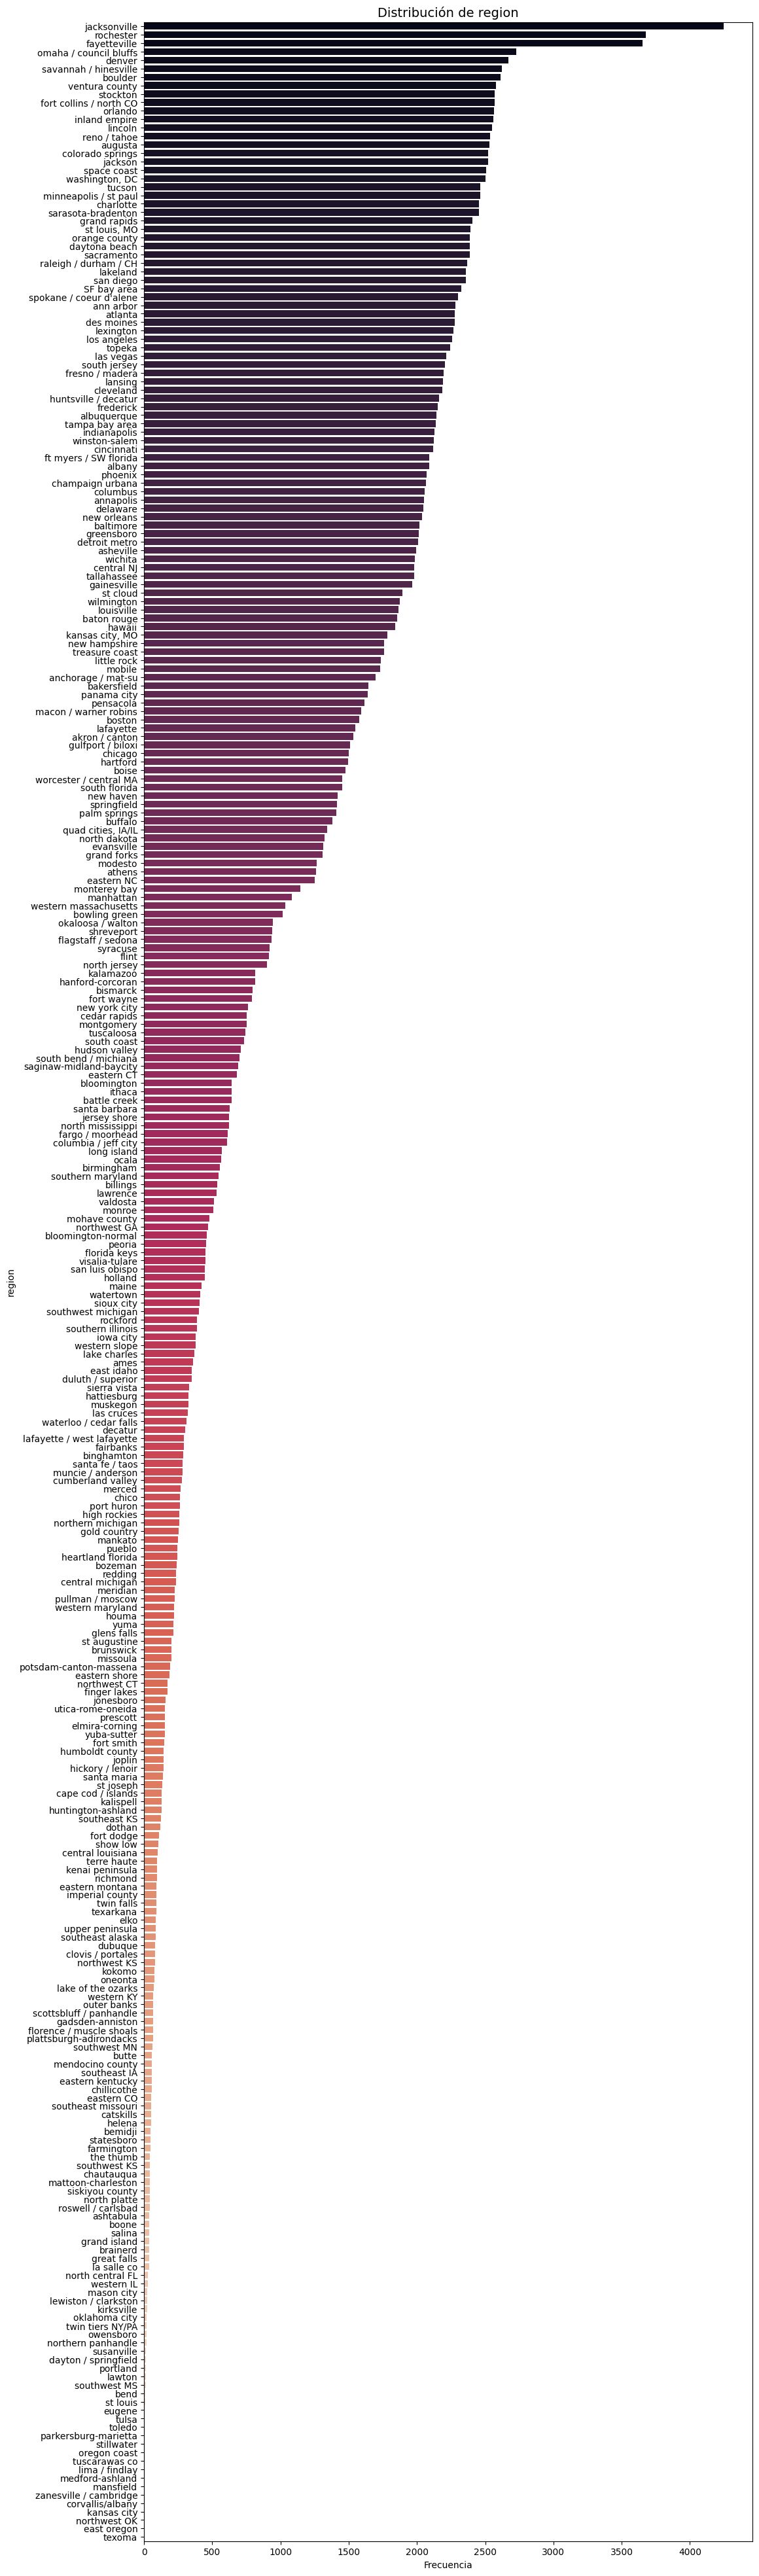

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


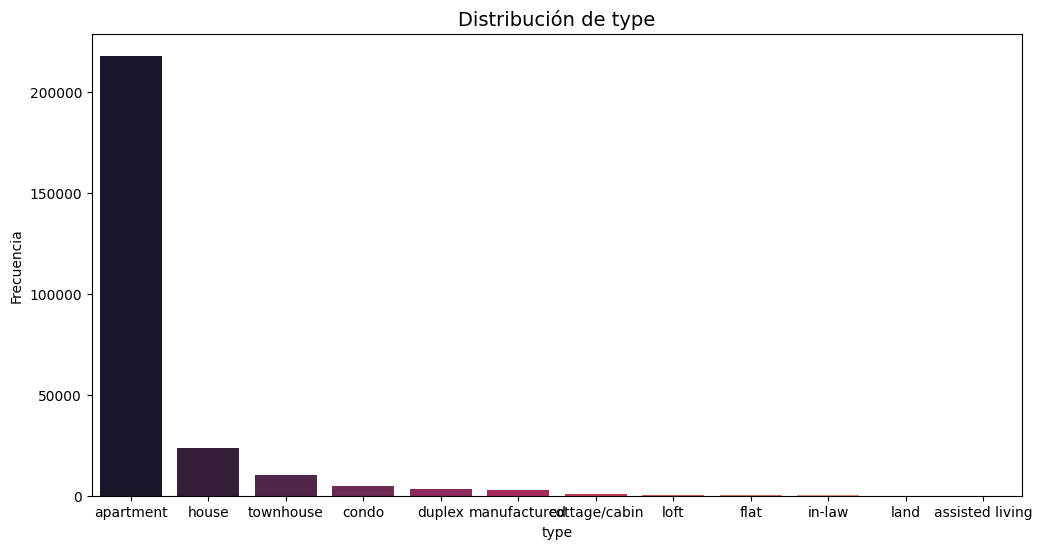

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


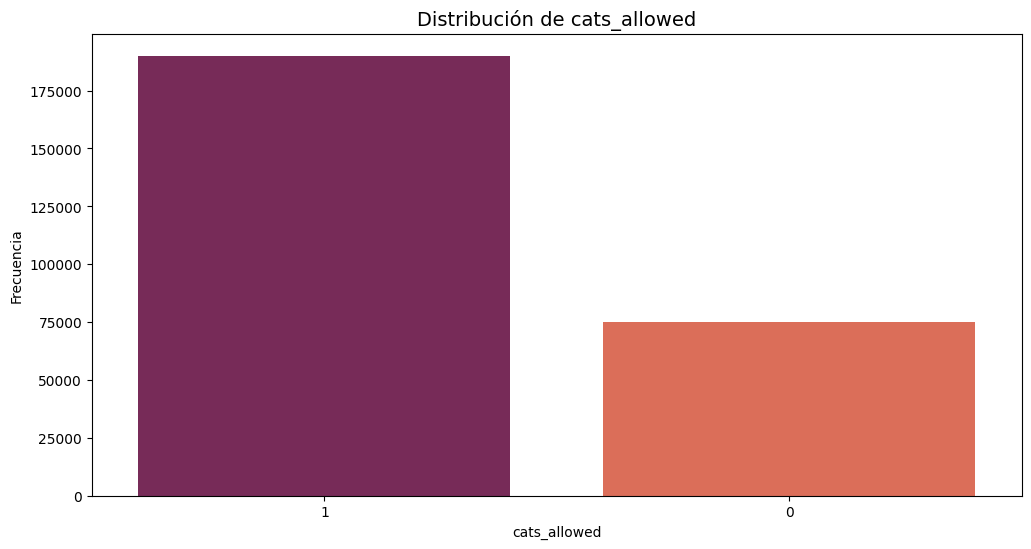

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


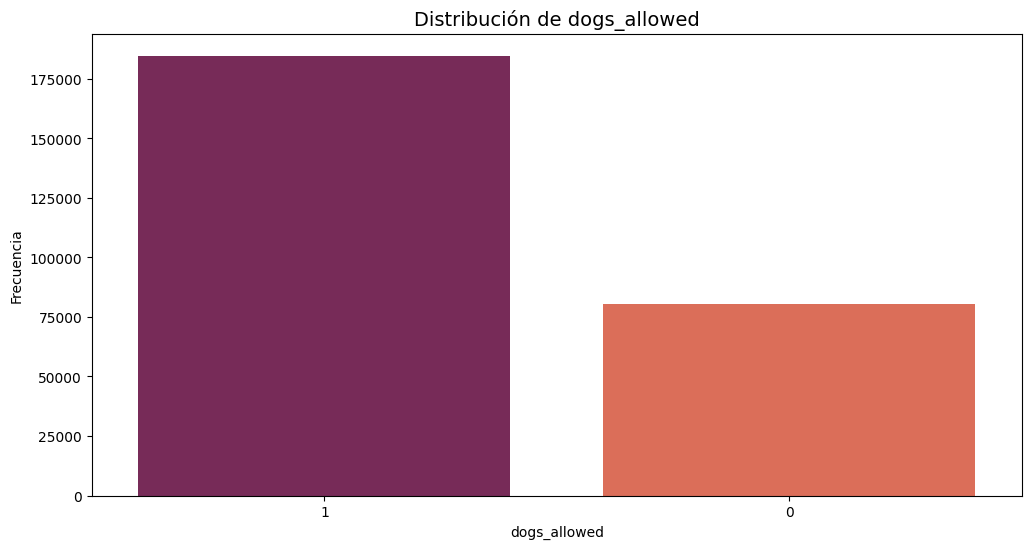

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


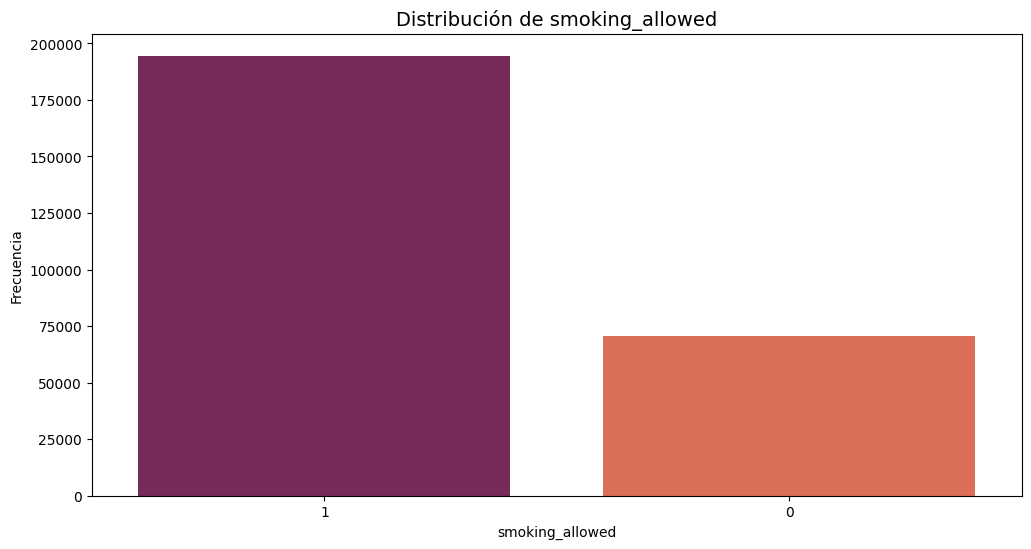

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


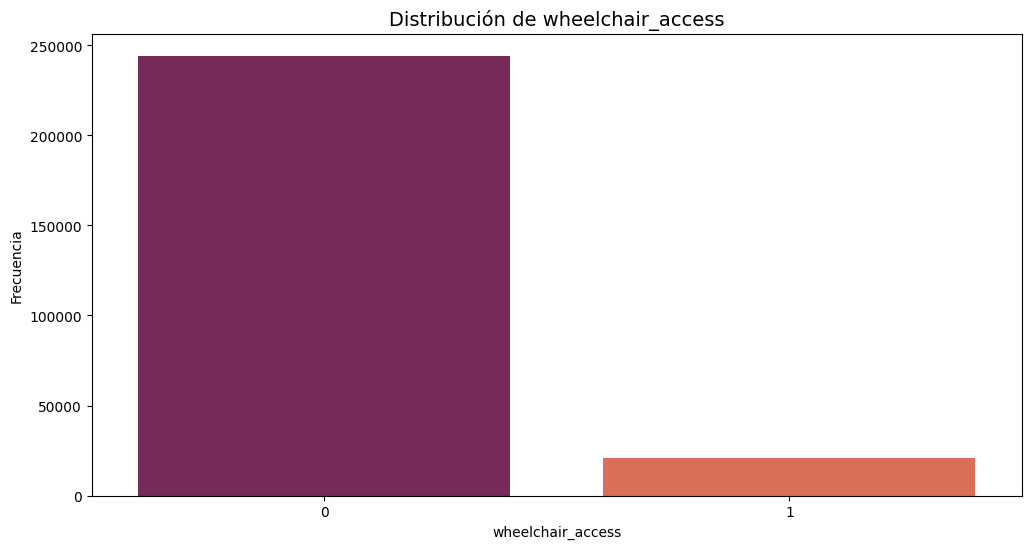

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


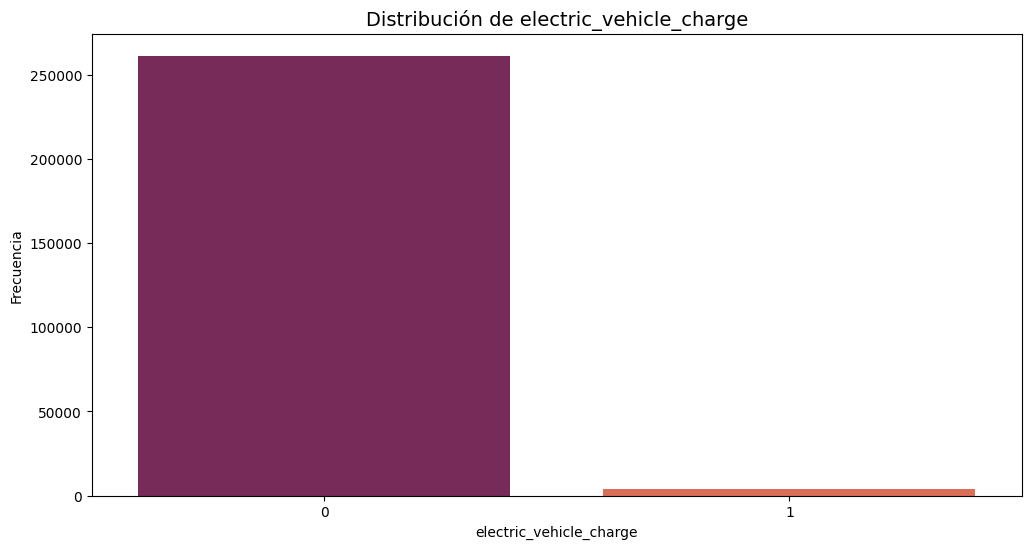

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


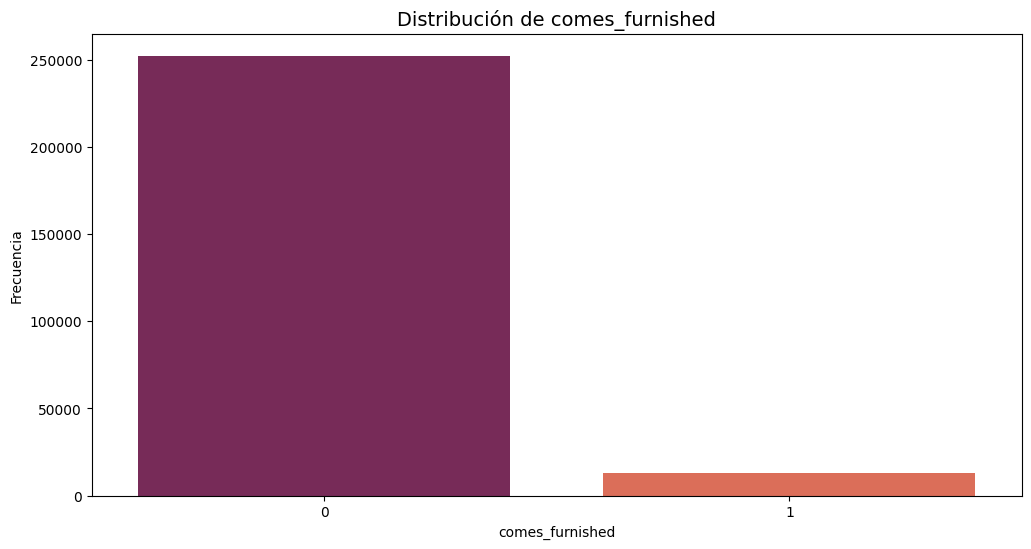

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


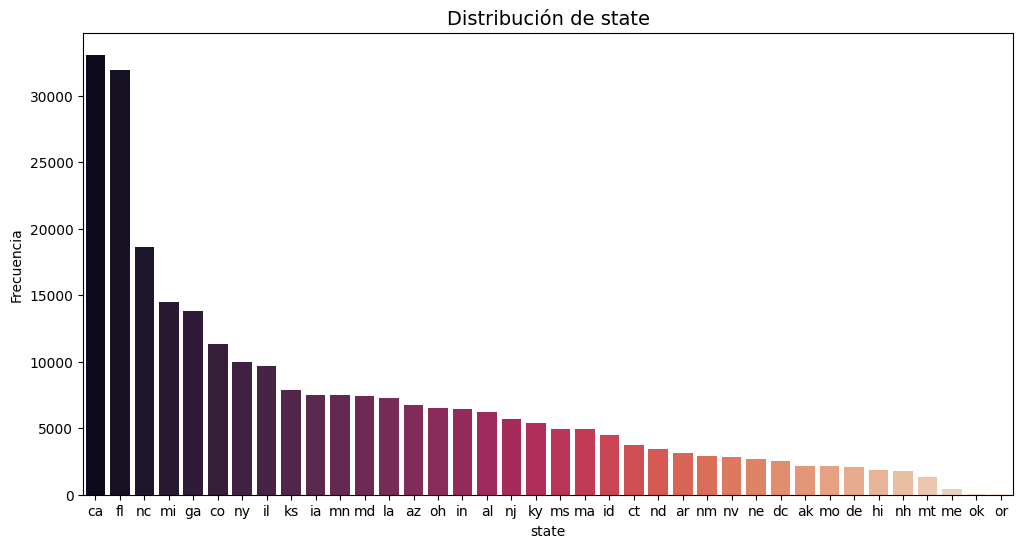

/var/folders/7f/k27myb3n6wq5gzlyjfbwkx5h0000gn/T/ipykernel_29303/872813270.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=var, order=order, palette="rocket")


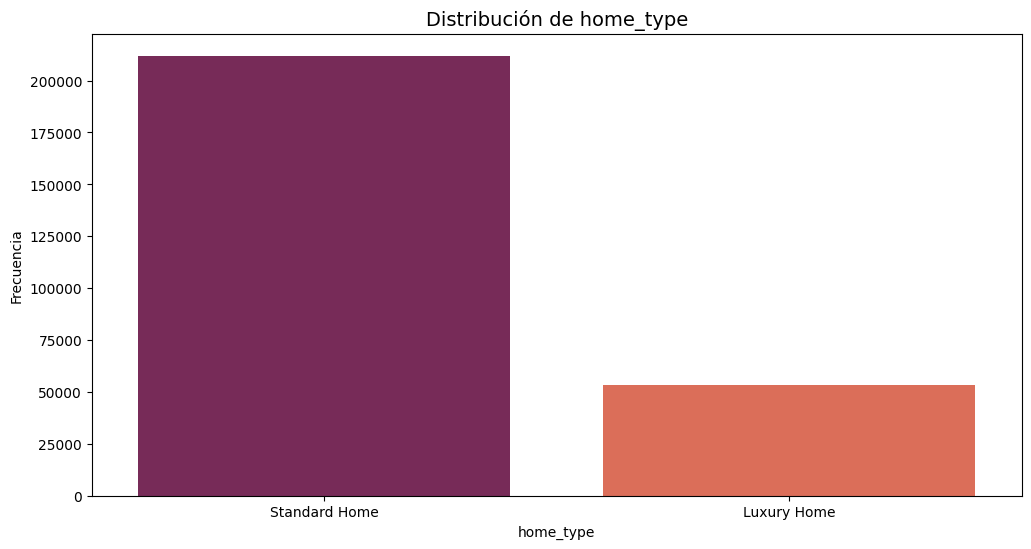

In [29]:
# Itera sobre cada variable categórica en la lista vars_cat.
for var in vars_cat:
    # Obtiene el orden de los valores en la variable categórica según su frecuencia.
    order = data[var].value_counts().index
    
    # Si la variable es "region", se configura un gráfico con orientación vertical.
    if var == "region":
        # Crea una nueva figura con un tamaño de 12x50 pulgadas.
        plt.figure(figsize=(12, 50))
        # Crea un gráfico de barras con orientación vertical para la variable "region".
        sns.countplot(data=data, y=var, order=order, palette="rocket")
        # Añade un título al gráfico.
        plt.title(f'Distribución de {var}', fontsize=14)
        # Añade una etiqueta al eje X.
        plt.xlabel('Frecuencia')
        # Añade una etiqueta al eje Y.
        plt.ylabel(var)
    else:
        # Crea una nueva figura con un tamaño de 12x6 pulgadas.
        plt.figure(figsize=(12, 6))
        # Crea un gráfico de barras con orientación horizontal para la variable.
        sns.countplot(data=data, x=var, order=order, palette="rocket")
        # Añade un título al gráfico.
        plt.title(f'Distribución de {var}', fontsize=14)
        # Añade una etiqueta al eje X.
        plt.xlabel(var)
        # Añade una etiqueta al eje Y.
        plt.ylabel('Frecuencia')
    
    # Muestra el gráfico.
    plt.show()

## Análisis Univeriado de Variables Númericas

In [30]:
data[vars_disc].value_counts()

beds  baths
1     1.0      78139
2     2.0      60112
      1.0      44257
3     2.0      29446
2     1.5      12245
               ...  
5     7.0          1
6     0.0          1
      1.0          1
7     1.0          1
4     6.0          1
Name: count, Length: 94, dtype: int64

## Análisis Univeriado de Variables Discretas

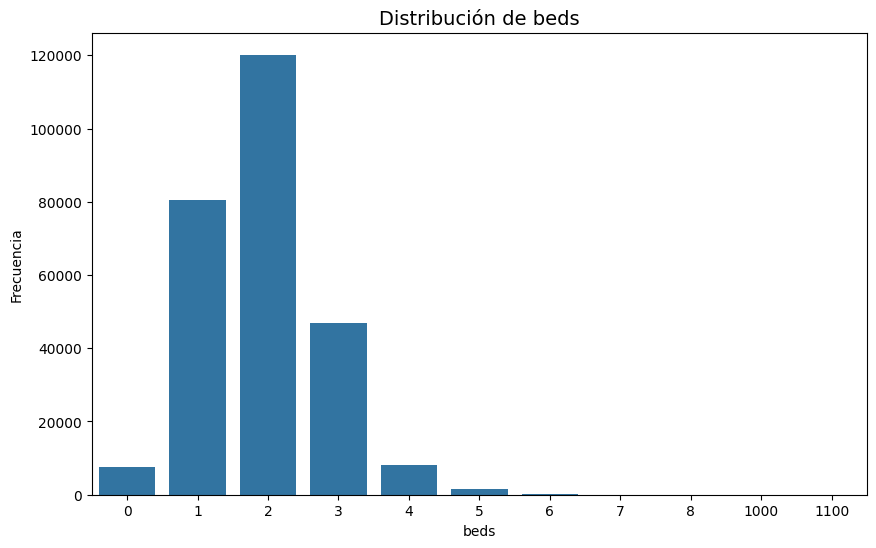

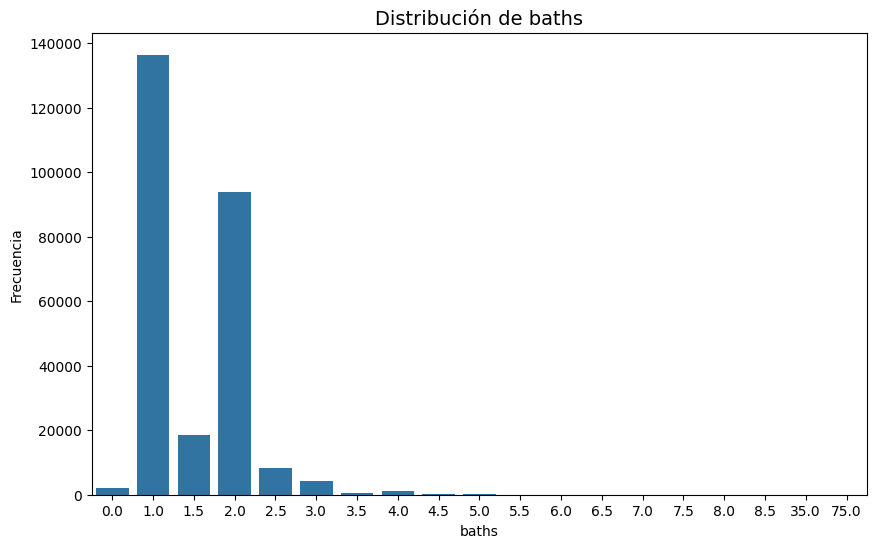

In [31]:
# Itera sobre cada variable discreta en la lista vars_disc.
for var in vars_disc:
    # Crea una nueva figura con un tamaño de 10x6 pulgadas.
    plt.figure(figsize=(10, 6))
    # Crea un gráfico de barras para la variable discreta.
    sns.countplot(data=data, x=var)
    # Añade un título al gráfico.
    plt.title(f'Distribución de {var}', fontsize=14)
    # Añade una etiqueta al eje X.
    plt.xlabel(var)
    # Añade una etiqueta al eje Y.
    plt.ylabel('Frecuencia')
    # Muestra el gráfico.
    plt.show()

## Análisis Univeriado de Variables Continuas

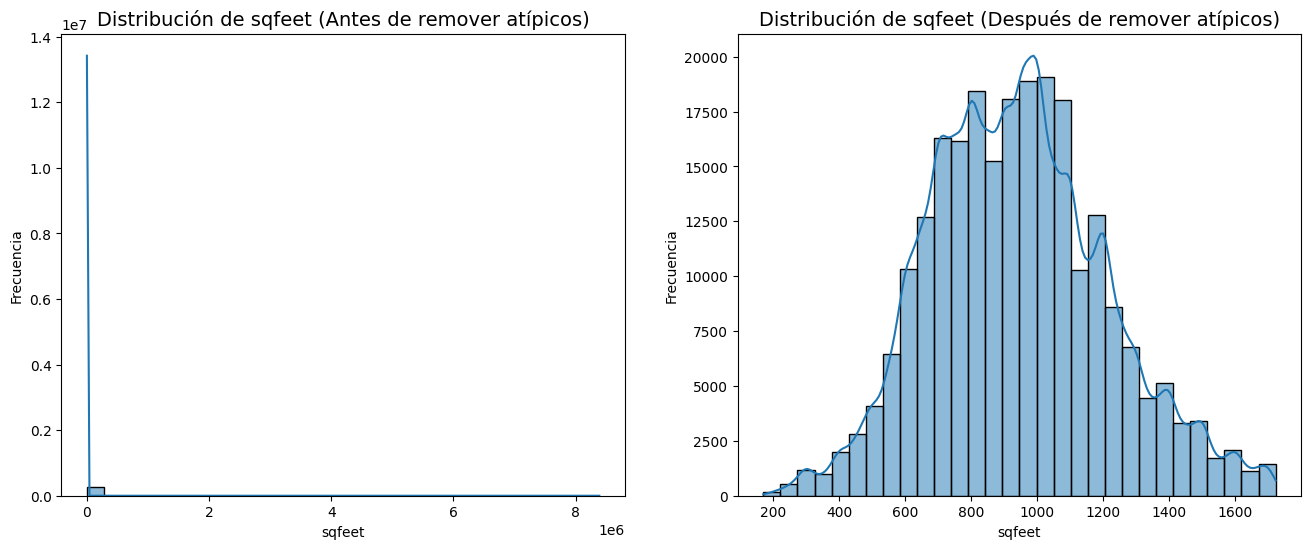

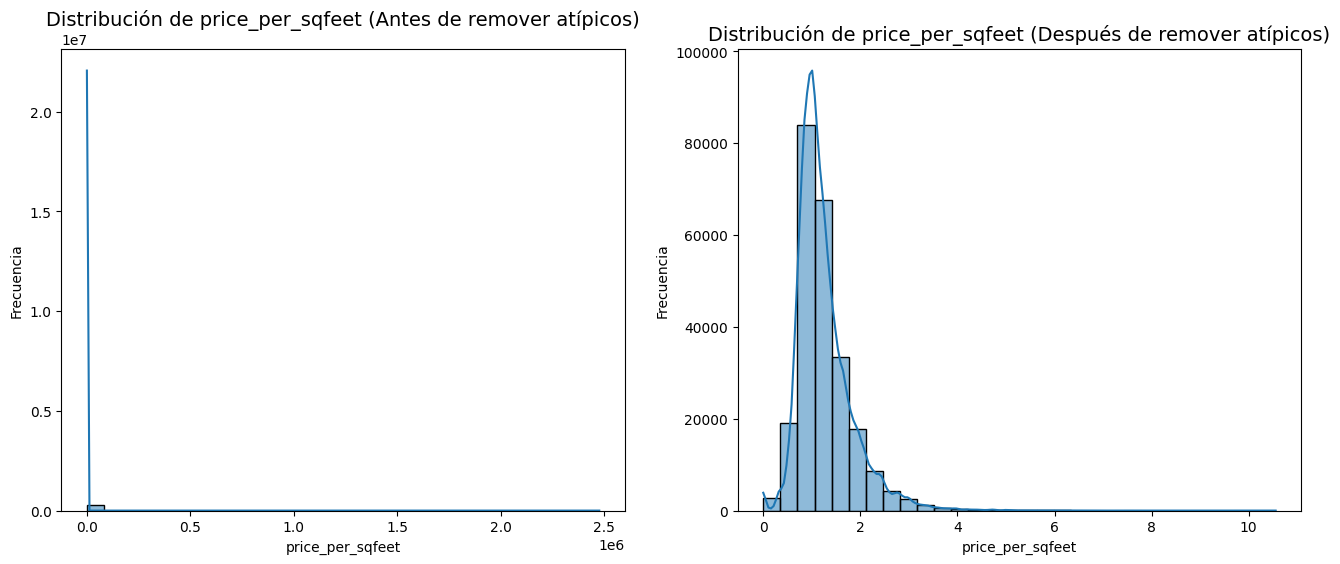

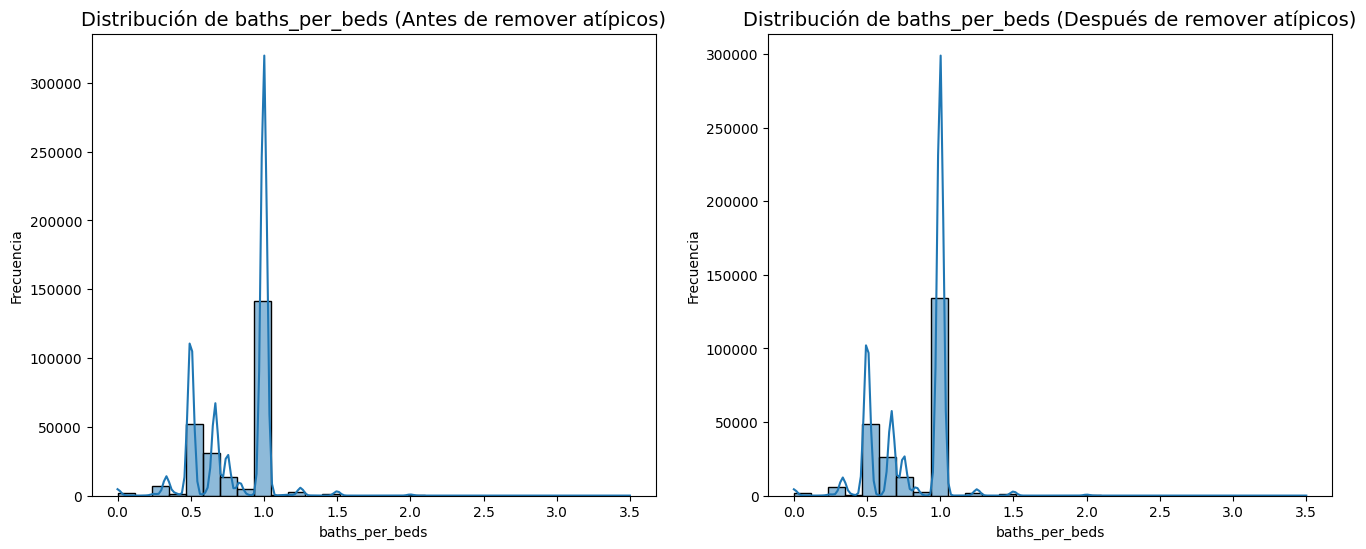

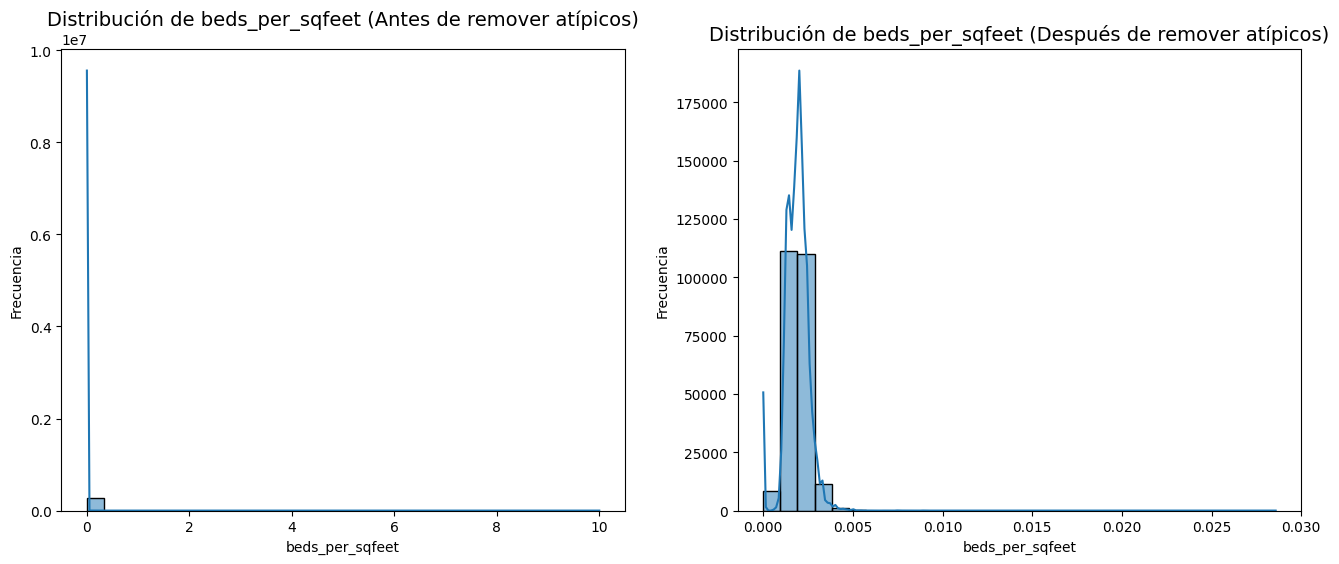

In [32]:
# Itera sobre cada variable continua en la lista vars_con.
for var in vars_con:
    # Crea una nueva figura con un tamaño de 16x6 pulgadas.
    plt.figure(figsize=(16, 6))
    
    # Crea el primer subplot (1 fila, 2 columnas, primer gráfico).
    plt.subplot(1, 2, 1)
    # Crea un histograma con una curva de densidad (kde) para la variable continua antes de remover atípicos.
    sns.histplot(data[var], kde=True, bins=30)
    # Añade un título al primer gráfico.
    plt.title(f'Distribución de {var} (Antes de remover atípicos)', fontsize=14)
    # Añade una etiqueta al eje X del primer gráfico.
    plt.xlabel(var)
    # Añade una etiqueta al eje Y del primer gráfico.
    plt.ylabel('Frecuencia')
    
    # Crea el segundo subplot (1 fila, 2 columnas, segundo gráfico).
    plt.subplot(1, 2, 2)
    # Crea un histograma con una curva de densidad (kde) para la variable continua después de remover atípicos.
    sns.histplot(data_cleaned[var], kde=True, bins=30)
    # Añade un título al segundo gráfico.
    plt.title(f'Distribución de {var} (Después de remover atípicos)', fontsize=14)
    # Añade una etiqueta al eje X del segundo gráfico.
    plt.xlabel(var)
    # Añade una etiqueta al eje Y del segundo gráfico.
    plt.ylabel('Frecuencia')
    
    # Muestra los gráficos.
    plt.show()

## Análisis multivariado

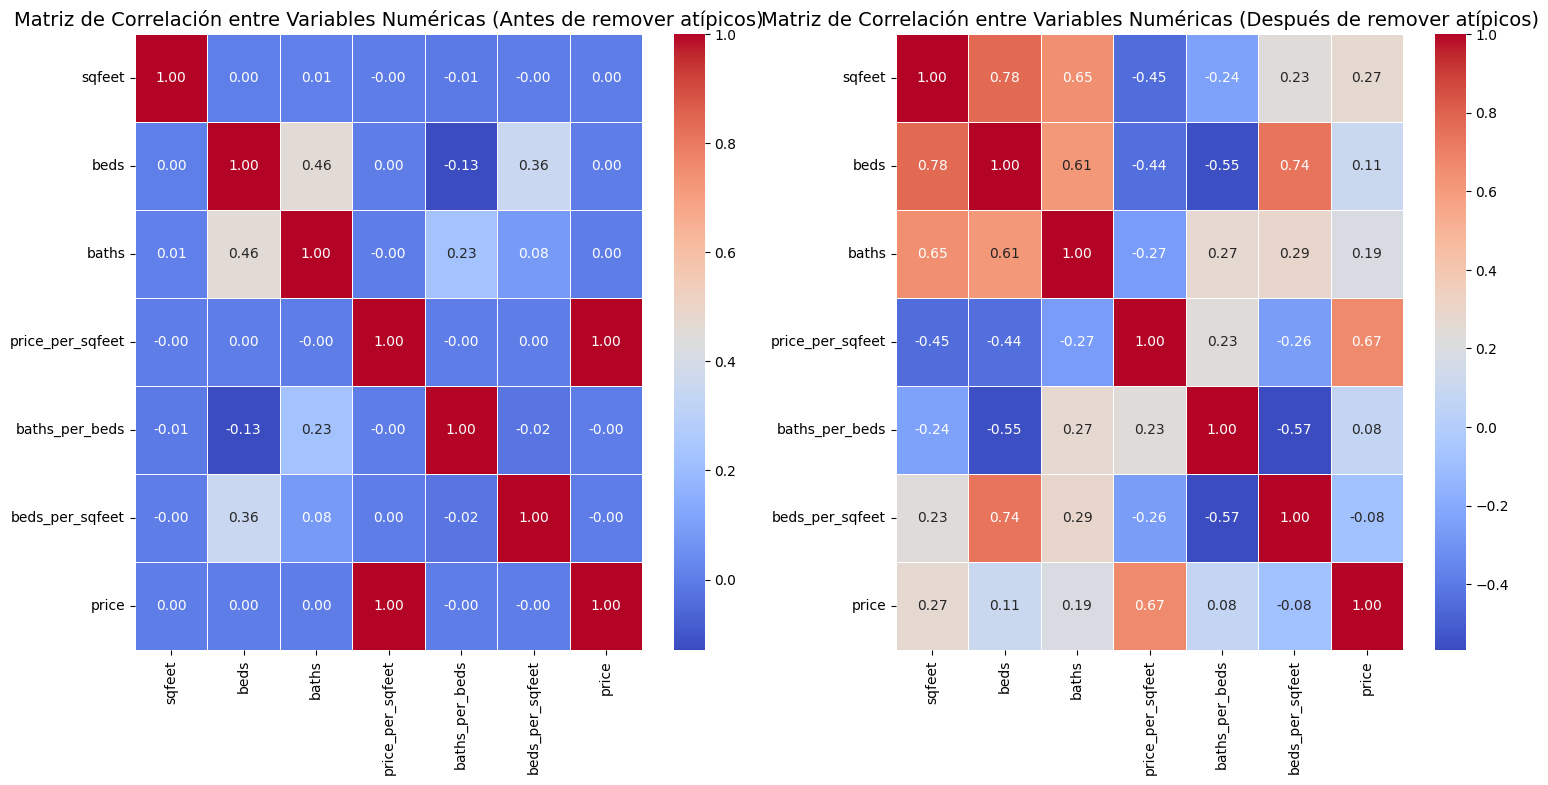

In [33]:
# Calcula la matriz de correlación para las variables numéricas y la variable objetivo antes de remover atípicos.
correlation_matrix = data[vars_nums + [targer_var]].corr()

# Crea una nueva figura con un tamaño de 18x8 pulgadas.
plt.figure(figsize=(18, 8))

# Crea el primer subplot (1 fila, 2 columnas, primer gráfico).
plt.subplot(1, 2, 1)
# Crea un mapa de calor (heatmap) para la matriz de correlación antes de remover atípicos.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Añade un título al primer gráfico.
plt.title("Matriz de Correlación entre Variables Numéricas (Antes de remover atípicos)", fontsize=14)

# Calcula la matriz de correlación para las variables numéricas y la variable objetivo después de remover atípicos.
correlation_matrix_cleaned = data_cleaned[vars_nums + [targer_var]].corr()

# Crea el segundo subplot (1 fila, 2 columnas, segundo gráfico).
plt.subplot(1, 2, 2)
# Crea un mapa de calor (heatmap) para la matriz de correlación después de remover atípicos.
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
# Añade un título al segundo gráfico.
plt.title("Matriz de Correlación entre Variables Numéricas (Después de remover atípicos)", fontsize=14)

# Muestra los gráficos.
plt.show()

# Pruebas de Hipotesis

## Preparación de los Datos

In [34]:
# --------------------------------------
# 6. Codificación de Variables Categóricas
# --------------------------------------
label_encoder = LabelEncoder()

# Apply Label Encoding to 'home_type'
data_cleaned['home_type'] = label_encoder.fit_transform(data_cleaned['home_type'])

# Define categorical columns for one-hot encoding (excluding 'home_type' now)
categorical_columns = ['type', 'state', 'region']

# Apply one-hot encoding to the remaining categorical variables
df_encoded = pd.get_dummies(data_cleaned, columns=categorical_columns, drop_first=True)

# Mostrar las primeras filas codificadas
print(df_encoded.head())

   price  sqfeet  beds  baths  cats_allowed  dogs_allowed  smoking_allowed  \
1   1120    1319     3    2.0             1             1                1   
2    825    1133     1    1.5             1             1                1   
3    800     927     1    1.0             1             1                1   
4    785    1047     2    1.0             1             1                1   
5    900    1298     2    2.0             1             1                1   

   wheelchair_access  electric_vehicle_charge  comes_furnished  ...  \
1                  0                        0                0  ...   
2                  0                        0                0  ...   
3                  0                        0                0  ...   
4                  0                        0                0  ...   
5                  0                        0                0  ...   

   region_western maryland  region_western massachusetts  \
1                    False                  

In [35]:
# Redondear los valores a 4 decimales
df_encoded = df_encoded.round(4)

In [36]:
# Selecciona las columnas numéricas del DataFrame df_encoded
numeric_cols = df_encoded.select_dtypes(include=[np.number])

# Define a threshold for extreme values (adjust as needed)
threshold = 1e10  # Example: Any value above 10 billion is considered too large

# Identify columns where max absolute value exceeds the threshold
large_values = numeric_cols.abs().max() > threshold

# Print only the columns with extreme values
print(numeric_cols.loc[:, large_values])

        baths_per_beds
1               0.6667
2               1.5000
3               1.0000
4               0.5000
5               1.0000
...                ...
265185          1.0000
265186          0.7500
265187          0.7500
265188          0.5000
265189          1.2500

[242639 rows x 1 columns]


In [37]:
# tpos de datos de las columnas
df_encoded.dtypes

price                              int64
sqfeet                             int64
beds                               int64
baths                            float64
cats_allowed                       int64
                                  ...   
region_winston-salem                bool
region_worcester / central MA       bool
region_yuba-sutter                  bool
region_yuma                         bool
region_zanesville / cambridge       bool
Length: 359, dtype: object

In [38]:
# Variables objetivo y predictoras para la base original
X_original = data[['beds', 'baths', 'sqfeet']]
y_original = data['price']

# Variables para la base tratada (sin atípicos, codificada y con nuevas características)
X_processed = df_encoded[['beds', 'baths', 'sqfeet']]
y_processed = df_encoded['price']

# Variables para la base tratada (sin atípicos, codificada y con nuevas características)
X_processed2 = df_encoded.drop(columns=['price', 'baths_per_beds'], errors='ignore')
y_processed2 = df_encoded['price']


# Variables para la base tratada (sin atípicos, codificada y con nuevas características)
X_processed_classification = df_encoded[['beds', 'baths', 'sqfeet', 'smoking_allowed', "wheelchair_access", "price_per_sqfeet",  "beds_per_sqfeet"]]
y_processed_classification = df_encoded['home_type']

In [39]:
# División train-test

# Divide los datos originales en conjuntos de entrenamiento y prueba
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Divide los datos procesados en conjuntos de entrenamiento y prueba
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

# Divide otro conjunto de datos procesados en conjuntos de entrenamiento y prueba
X_train_proc2, X_test_proc2, y_train_proc2, y_test_proc2 = train_test_split(X_processed2, y_processed2, test_size=0.2, random_state=42)

# Divide los datos procesados para clasificación en conjuntos de entrenamiento y prueba
X_train_proc_classification, X_test_proc_classification, y_train_proc_classification, y_test_proc_classification = train_test_split(X_processed_classification, y_processed_classification, test_size=0.2, random_state=42)

In [40]:
# Función para entrenar, evaluar y graficar modelos
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, title):
    # Entrenamiento
    model.fit(X_train, y_train)

    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Cálculo de métricas
    metrics = {
        "MAE_Train": mean_absolute_error(y_train, y_pred_train),
        "RMSE_Train": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2_Train": r2_score(y_train, y_pred_train),
        "MAE_Test": mean_absolute_error(y_test, y_pred_test),
        "RMSE_Test": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2_Test": r2_score(y_test, y_pred_test)
    }

    # Gráfico de predicciones vs valores reales
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel("Precio Real")
    plt.ylabel("Precio Predicho")
    plt.title(f"{title} - Predicción vs Real")
    plt.show()

    return metrics

In [41]:
# --------------------------------------------
# 2. Modelos y Evaluación
# --------------------------------------------

models = {
    "Regresión Lineal Múltiple": LinearRegression(),
    "Lasso (alpha=0.1)": Lasso(alpha=0.1),
    "Ridge (alpha=1.0)": Ridge(alpha=1.0)
}

results = []


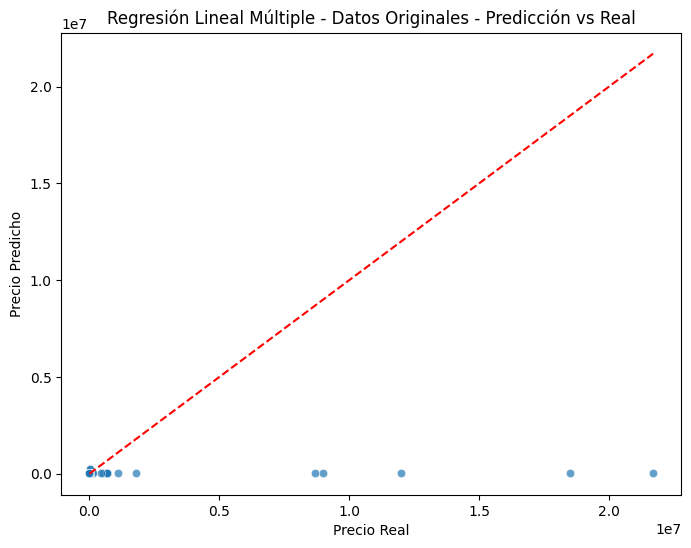

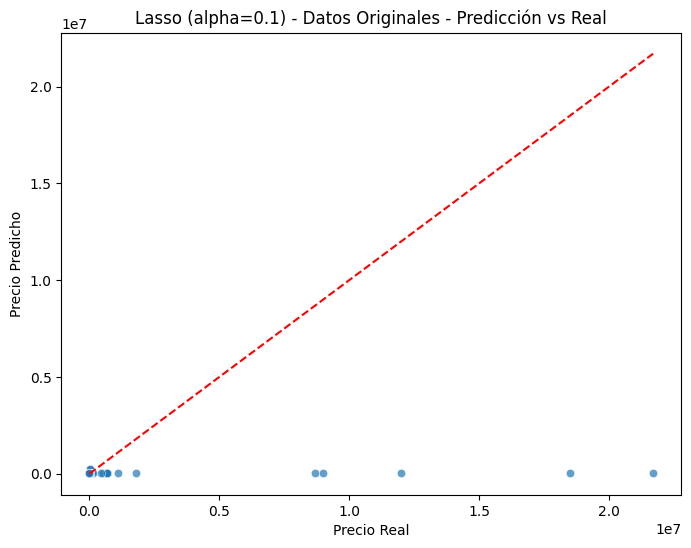

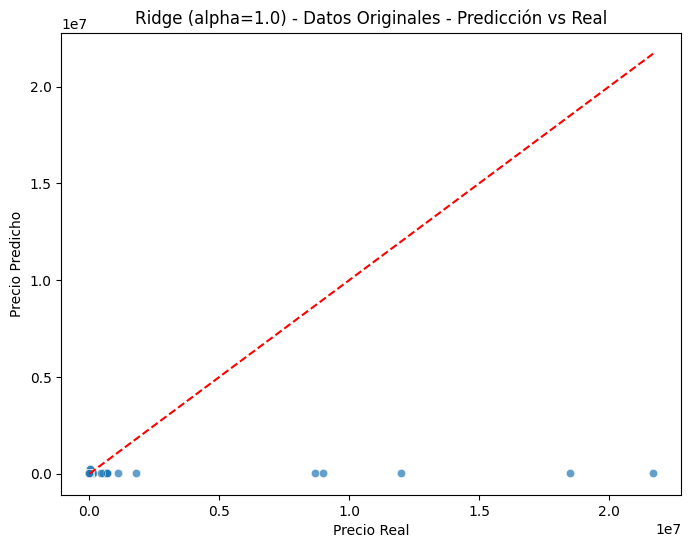

In [42]:
# Entrenamiento y evaluación con la base original
for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_orig, X_test_orig, y_train_orig, y_test_orig, f"{name} - Datos Originales")
    results.append({"Modelo": name + " - Original", **metrics})

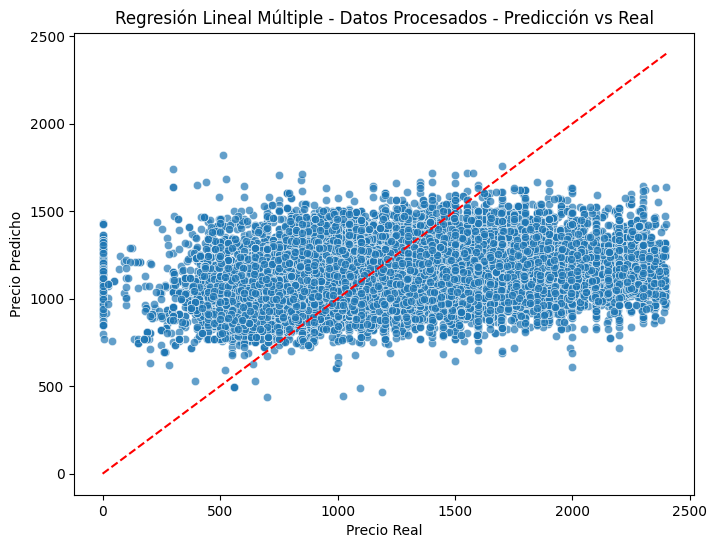

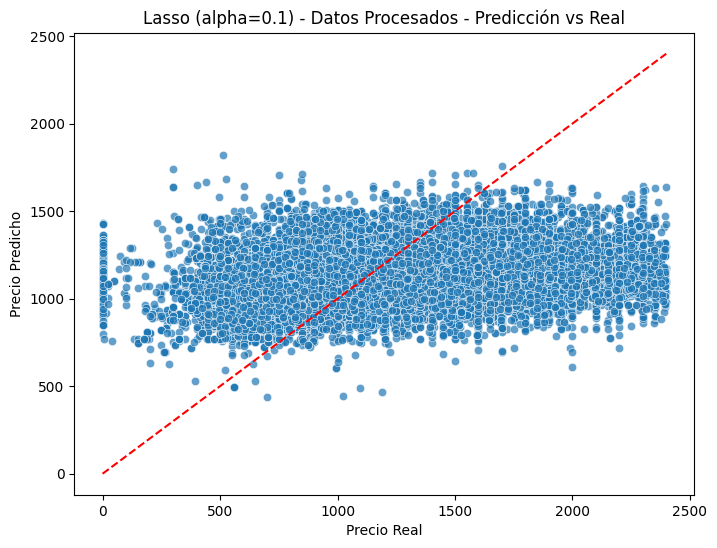

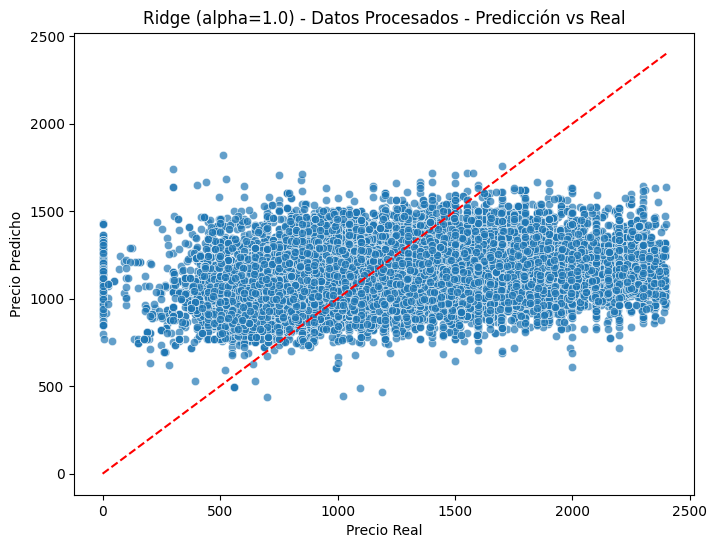

In [43]:
# Entrenamiento y evaluación con la base tratada
for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_proc, X_test_proc, y_train_proc, y_test_proc, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado", **metrics})

In [44]:
X_train_proc_classification, X_test_proc_classification, y_train_proc_classification, y_test_proc_classification

(        beds  baths  sqfeet  smoking_allowed  wheelchair_access  \
 123504     2    1.5    1100                1                  0   
 38038      1    1.0     889                1                  0   
 119817     3    2.0    1050                1                  0   
 225748     1    1.0     724                0                  0   
 216590     1    1.0     685                1                  0   
 ...      ...    ...     ...              ...                ...   
 134262     2    1.0     915                1                  0   
 116092     2    2.0    1080                1                  0   
 146779     2    1.0     744                0                  0   
 162288     4    2.0    1650                1                  0   
 136424     3    2.0    1173                1                  1   
 
         price_per_sqfeet  beds_per_sqfeet  
 123504            0.6727           0.0018  
 38038             1.9865           0.0011  
 119817            0.5324           0.0029  
 2

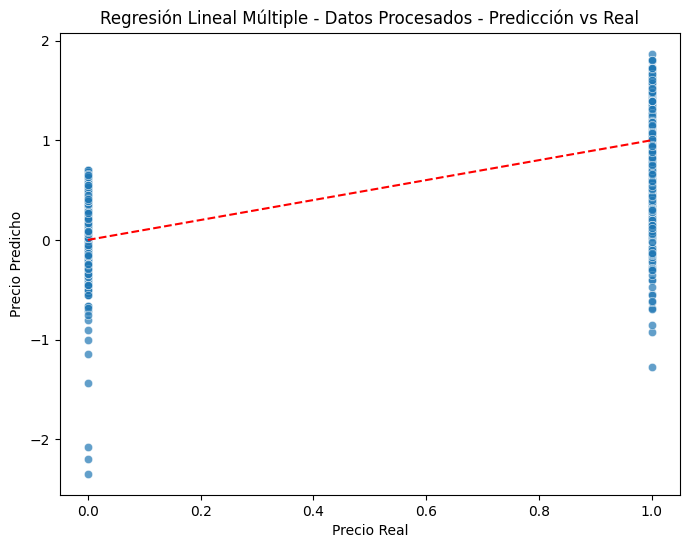

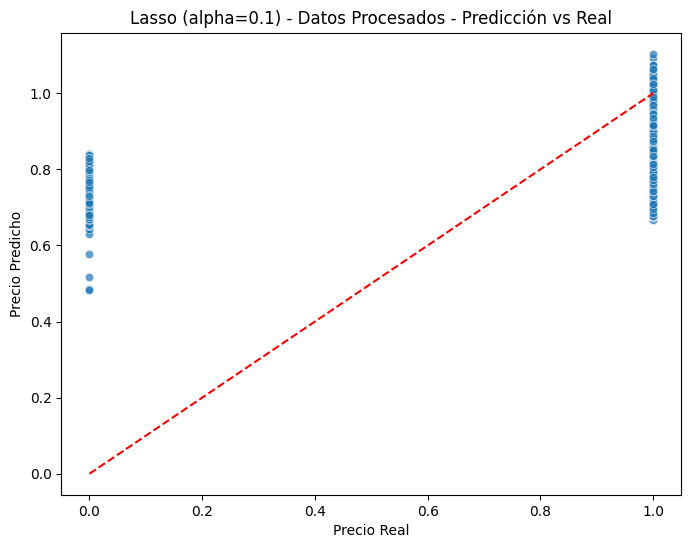

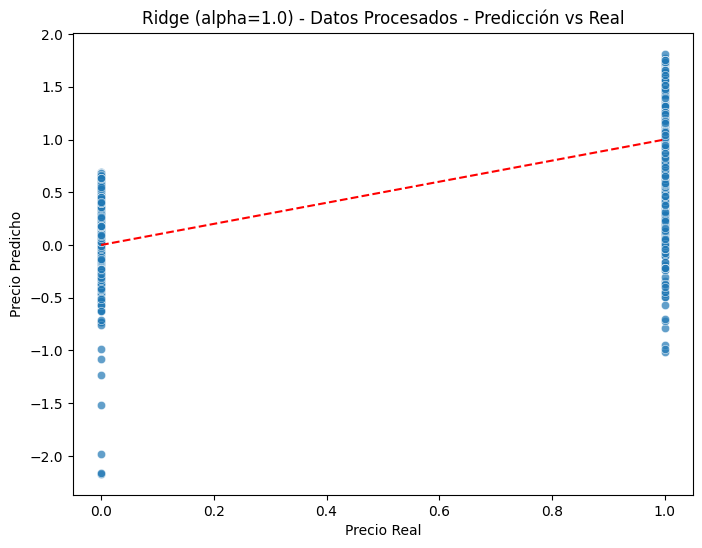

In [45]:
# Entrenamiento y evaluación con la base tratada
for name, model in models.items():
    # Entrena y evalúa el modelo utilizando los datos procesados para clasificación
    metrics = train_and_evaluate_model(model, X_train_proc_classification, X_test_proc_classification, y_train_proc_classification, y_test_proc_classification, f"{name} - Datos Procesados")
    
    # Añade los resultados del modelo a la lista de resultados
    results.append({"Modelo": name + " - Procesado", **metrics})

In [46]:
# verificar las metricas de los modelos
print(metrics)

{'MAE_Train': 0.2010993223362003, 'RMSE_Train': 0.2665076650504481, 'R2_Train': 0.4459407322117185, 'MAE_Test': 0.19946499754068192, 'RMSE_Test': 0.2641040665675842, 'R2_Test': 0.4529212841416035}


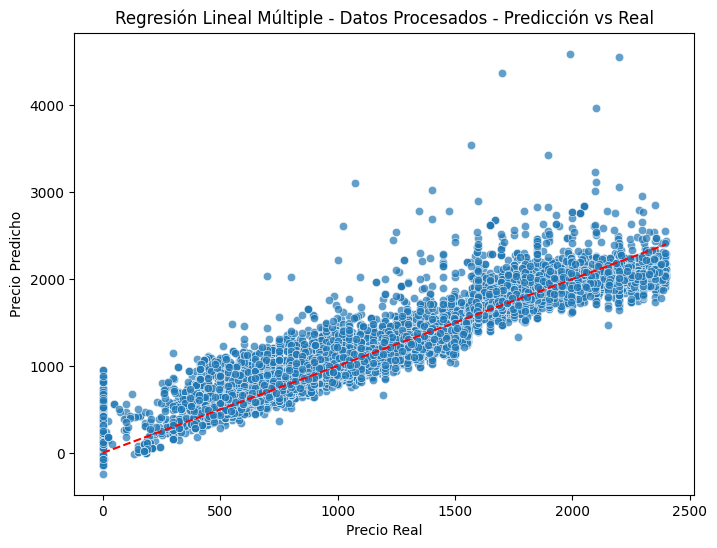

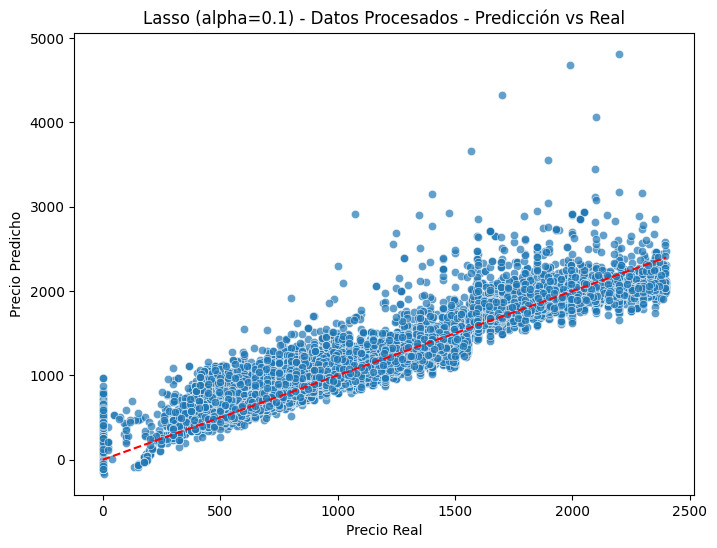

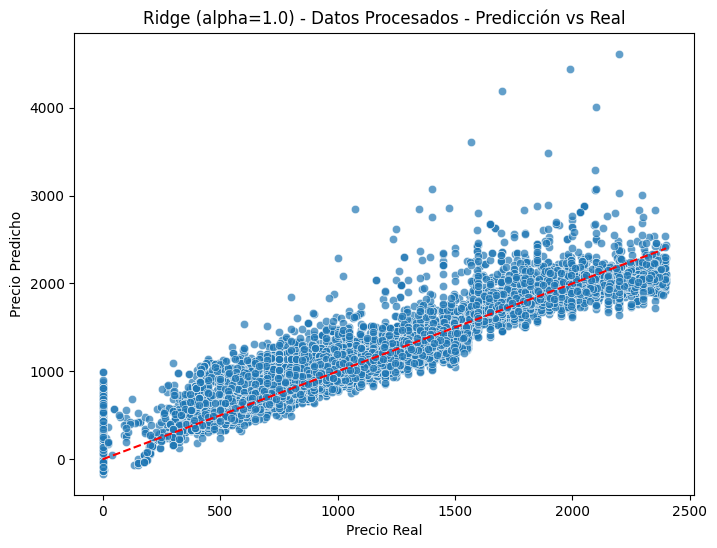

In [47]:
# Entrenamiento y evaluación con la base tratada
for name, model in models.items():
    metrics = train_and_evaluate_model(model, X_train_proc2, X_test_proc2, y_train_proc2, y_test_proc2, f"{name} - Datos Procesados")
    results.append({"Modelo": name + " - Procesado", **metrics})

# FIN